# Importamos las librerias necesarias 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score, auc, classification_report

# Data Frame a utilizar 

In [60]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección 
# y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
# tras observar los datos del día de hoy, el objetivo es predecir las variables target:
# -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
# -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Análisis descriptivo de los datos

In [61]:
### Vista de datos
df.head()
df.tail()

# Borramos columna de índices porque no la necesitamos, y además, tiene faltantes.
df.drop(df.columns[0], axis=1, inplace=True)
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [62]:
# Columnas del dataframe
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [63]:
# Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
tipos_de_datos = df.dtypes

variables_categoricas = tipos_de_datos[df.dtypes == 'object'].index
variables_numericas = tipos_de_datos[df.dtypes != 'object'].index

print("Variables Categóricas:")
print(variables_categoricas)
print("\nVariables Numéricas:")
print(variables_numericas)

Variables Categóricas:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Variables Numéricas:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')


# Significado de las variables categóricas
Date [String]: fecha de la muestra, expresada en AAAA-MM-DD.
Location [String]: ciudad donde se toma la muestra.
WindGustDir [String]: dirección desde la cual se registró la ráfaga de viento más fuerte.
WindDir9am [String]: dirección del viento a las 9am.
WindDir3pm [String]: dirección del viento a las 3pm.
RainToday [String]: indica si llovió ese día.
RainTomorrow [String] (OBJ): predice si lloverá al día siguiente.

In [64]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [77]:
# Valores que asumen las variables categóricas.
print(df['Location'].unique())
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['No' 'Yes' nan]


# Significado de las variables numéricas
-MinTemp: temperatura mínima registrada en ese día, en °C.
-MaxTemp: temperatura máxima registrada en ese día, en °C.
-Rainfall: cantidad de lluvia registrada ese día, en mm.
-Evaporation: cantidad de agua evaporada durante ese día, en mm.
-Sunshine: cantidad de horas de sol durante ese día.
-WindGustSpeed: velocidad máxima del viento registrada ese día, en km/h.
-WindSpeed9am: velocidad del viento registrada ese día a las 9am, en km/h.
-WindSpeed3pm: velocidad del viento registrada ese día a las 3pm, en km/h.
-Humidity9am: porcentaje de humedad en el aire a las 9am.
-Humidity3pm: porcentaje de humedad en el aire a las 3pm.
-Pressure9am: presión atmosférica registrada a las 9am, en hPa.
-Pressure3pm: presión atmosférica registrada a las 3pm, en hPa.
-Cloud9am: variable sin unidad, representando la cantidad de nubes registrada a las 9am.
-Cloud3pm: variable sin unidad, representando la cantidad de nubes registrada a las 3pm.
-Temp9am: temperatura registrada a las 9am, en °C.
-Temp3pm: temperatura registrada a las 3pm, en °C.
-RainfallTomorrow (OBJ): cantidad de lluvia registrada al día siguiente, en mm.

In [66]:
# Ejecutamos algunos comandos para deducir las unidades.
df_filtered = df[df['Rainfall'] != 0]
promedio = df_filtered['Rainfall'].mean()
mediana = df_filtered['Rainfall'].median()
print("Promedio de 'Rainfall' después de eliminar los valores 0:", promedio)
print("Mediana de 'Rainfall' después de eliminar los valores 0:", mediana)

Promedio de 'Rainfall' después de eliminar los valores 0: 6.5682012952708915
Mediana de 'Rainfall' después de eliminar los valores 0: 2.2


In [73]:
# A continuación se muestran algunos datos de cada columna, como la cantidad de datos, media, desvío, cuartiles
# Solo sobre variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

In [86]:
# De todas las ciudades que contiene el dataset solo nos quedamos con las filas que contienen las ciudad que nos interesan
# Ciudades de interes: Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.

#Nos quemos con los datos de las locations que nos interesan
ciudades_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para mantener solo las filas con las ciudades deseadas
df = df[df['Location'].isin(ciudades_deseadas)]

In [87]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= df.value_counts('Location')
print(data_country)

Location
Canberra            3435
Sydney              3343
Adelaide            3192
Melbourne           3192
MountGambier        3039
Cobar               3008
Dartmoor            3008
MelbourneAirport    3008
SydneyAirport       3008
Name: count, dtype: int64


# Valores atípicos y faltanes

In [98]:
# Cantidad de valores faltantes.
print(df.isna().sum())

# Veremos cómo completar las temperaturas:
#print(df[df['MinTemp'].isnull() & df['MaxTemp'].isnull() & df['Temp9am'].isnull() & df['Temp3pm'].isnull()])

# Vemos que cuando una temperatura es nula, casi siempre todas son nulas, así que no podemos usar uno de esos 
# datos para completar. Cambiemos de estrategia.


                  Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
Location                                                                    
Adelaide             0         0        2        2       102         1488   
Canberra             0         0        6        3        18         1603   
Cobar                0         0        6        3        21          342   
Dartmoor             0         0       69       63        67          408   
Melbourne            0         0      480      481       758            3   
MelbourneAirport     0         0        0        0         0            3   
MountGambier         0         0        2        4         9          409   
Sydney               0         0        4        2         7           51   
SydneyAirport        0         0        1        0         4           46   

                  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Location                                                            ...   
Ad

In [ ]:
# Bajemos estos porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
#print(porcentaje_nulos_con_nombres)

<Axes: >

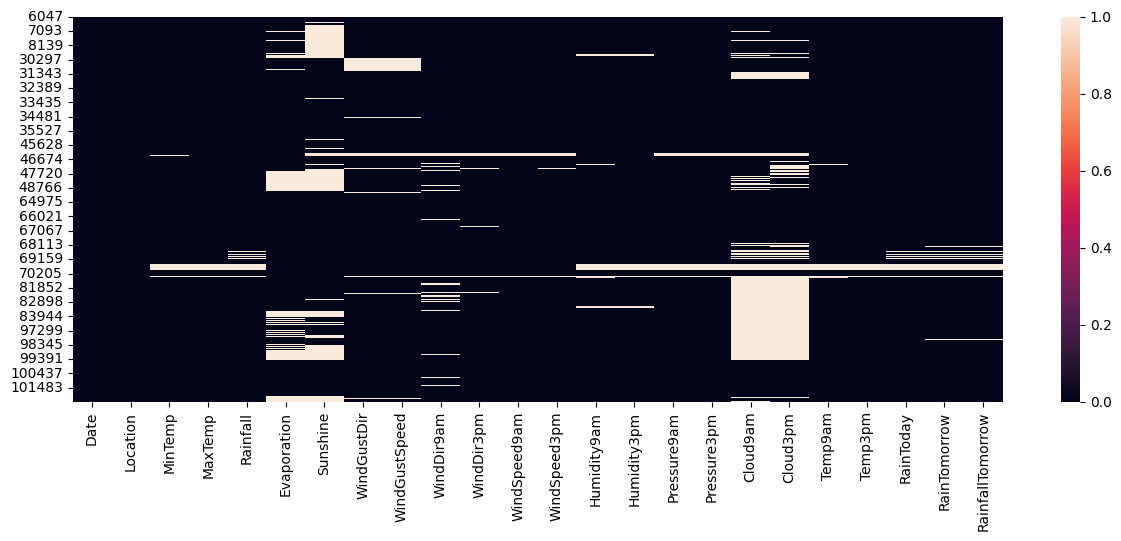

In [100]:
# Visualización de los nulos en una sección del dataframe
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [126]:
# A continuación creamos una función que busca en el dataset las tempraturas del año anterior, 
# que coinciden con cierto día y también del día anterior y posterior a este.
#print(df)
def promedio(fech, location, data, columna):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
    x1 = data[(data['Date'] == fecha_anio_anterior) & (data["Location"]==location)][columna]
    x2 = data[(data['Date'] == fecha_dia_desp) & (data["Location"]==location)][columna]
    x3 = data[(data['Date'] == fecha_dia_ant) & (data["Location"]==location)][columna]

    print(x1)
    print(x2)
    print(x3)

promedio("2009-01-01", "Cobar", df, "MinTemp")


IndexError: single positional indexer is out-of-bounds

In [99]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)

           Location  Total_Nulos
0          Adelaide        10091
1          Canberra         8375
2             Cobar         4057
3          Dartmoor         8909
4         Melbourne         9126
5  MelbourneAirport          106
6      MountGambier         1373
7            Sydney         3525
8     SydneyAirport          220
